# Statistical Thinking

###### Data around salaries was collected in order to help matric learners understand what factors influence earning a high salary. For this dataset, factors such as experience, having a degree, gender and the number of years in the industry were considered among others. 

##### Importing the libraries which will be needed to analyse the dataset.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import stats
from tabulate import tabulate

In [32]:
df = pd.read_csv('salary.csv')



#### Checking for any missing values

In [3]:
df.isnull().count()

salary         514
exprior        514
yearsworked    514
yearsrank      514
market         514
degree         514
otherqual      514
position       514
male           514
Field          514
yearsabs       514
dtype: int64

##### There are 514 respondents in the dataframe.There is one missing value from the salary column. In future I will replace the issing value with the salary mean so that the visualisations can be more accurate.

##### Displaying the minimum and maximum salaries in df

In [4]:
max_salary = df['salary'].max()
min_salary = df['salary'].min()
max_salary,min_salary

(96156.0, 29000.0)

###### The highest salary is R96156.00 and the lowest salary in df is R29000.00. In future I will explore the factors that lead to the difference between the minimum and maximum salaries.

######  Mean salary

In [5]:
avg_salary = df.salary.mean()


###### The average salary is: R50 863.22

##### The standard error of mean. This shows how far the sample mean is from the true mean of the population.

In [6]:
std_salary = df.salary.std()
std_error_mean = std_salary/np.sqrt(514)
std_error_mean

559.517202489284

###### The standard deviation of 'yearsworked'.

In [7]:
yrsworked_std = df['yearsworked'].std()
yrsworked_std

9.444695144169803

##### The median salary for the sample

In [8]:
salary_median = df['salary'].median()
salary_median

50096.0

##### The Inter Quartile Range for salary.

In [9]:
q25,q50,q75 = df['salary'].quantile([0.25,0.50,0.75])
iqr = q75 - q25


###### The IQR for salary is R20345.00

###### Sorting the counts of males and females into a table. Males are represented by '1', women are represented by '0'.

In [30]:


males = df['male']==1

females = df['male']==0
df[females].count(),df[males].count()

gender = {'males':386,'females':128}
   
headers = ['Gender','Count']
a = tabulate(gender.items(), headers = headers)
b = print(a)
b

Gender      Count
--------  -------
males         386
females       128


#### How many male executives are there compared to women?

###### Number of male executives:

In [11]:
exec_male = (df['position'] == 3) & (df['male'] == 1)
a = df[exec_male]['male'].count()
print('The number of male executives is',a)

The number of male executives is 192


#### Number of female executives:

In [12]:
exec_female = (df['position'] == 3) & (df['male'] == 0)
b = df[exec_female]['male'].count()
print('The number of female executives is',b)

The number of female executives is 19


######  91% of executives are men and only 9% of executives are women.

###### I am replacing the null value in salary with the mean salary because null values cannot be plotted in a graph.

In [13]:
df = df.replace(np.nan,salary_median)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         514 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


Text(0.5,1,'Graph showing the spread of salaries and the number of people in each range')

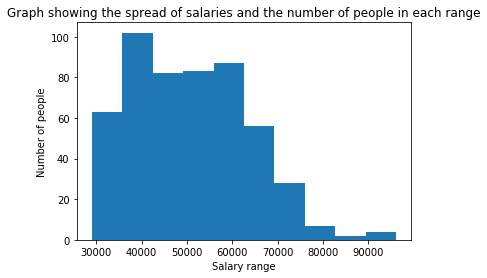

In [14]:
plt.hist(df['salary'],bins=10)
plt.ylabel('Number of people')
plt.xlabel('Salary range')
plt.title('Graph showing the spread of salaries and the number of people in each range')

###### Distribution seems to be positively skewed because the histogram's tail seems to be extending to the positive direction. This means that the mean is greater than the median which is true for this dataset.


In [15]:
avg_salary_males = df[males]['salary'].mean()
avg_salary_males

53496.37952365284

In [16]:
avg_salary_females = df[females]['salary'].mean()
avg_salary_females

42916.60479734375

/home/madi/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/madi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Graph showing average salaries for males and females')

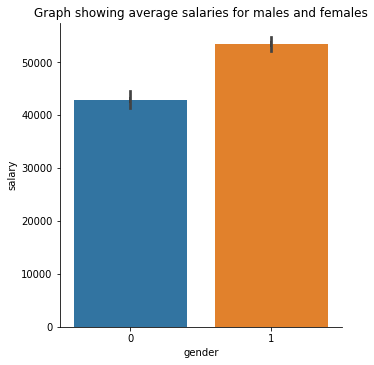

In [17]:
sns.factorplot(x='male', y='salary', data=df, kind='bar',yerr=std_error_mean)
plt.xlabel('gender')
plt.title('Graph showing average salaries for males and females')


######  The average salary for males is R53 498.00  and the average salary for females is R42 916.00 . There is a significant difference between what men and women earn. Error bars have been added to the plot in order to show how precise the plot is.

Text(0.5,1,'Experience prior to working in the field vs Salary for males and females')

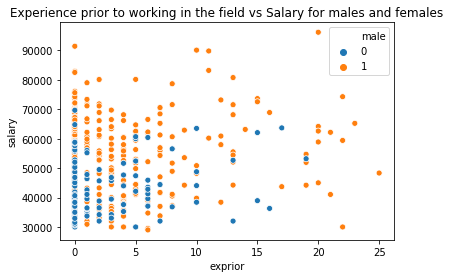

In [22]:
sns.scatterplot(x='exprior',y='salary',data=df,hue='male')
plt.title('Experience prior to working in the field vs Salary for males and females')

###### The aim of the above graph is to find out whether having prior experience contributes to the gap between average salaries of men and women. It shows no conclusive evidence.

Text(0.5,1,'Field vs Salary for men and women')

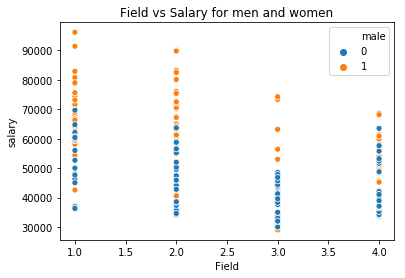

In [20]:
sns.scatterplot(x='Field',y='salary',data=df,hue='male')
plt.title('Field vs Salary for men and women')

###### The above graph shows that women generally earn less than men even in the same field.

Text(0.5,1,'Position vs Salary for men and women')

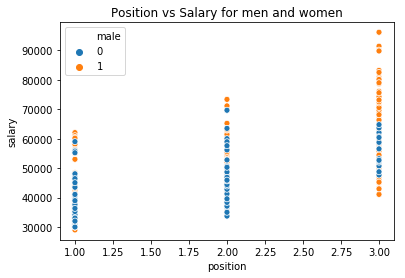

In [23]:
sns.scatterplot(x='position',y='salary',data=df,hue='male')
plt.title('Position vs Salary for men and women')

###### 1=Junior,2=Manager,3=Executive. The above graph shows that women are more concentrated in manager and junior positions while men are more concentrated in executive positions.

Text(0.5,1,'Years absent from work vs Salary for men and women')

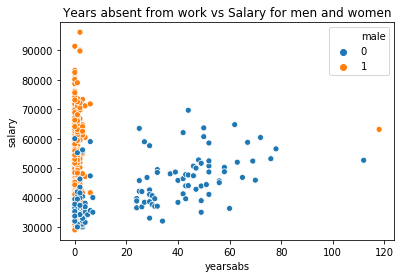

In [24]:
sns.scatterplot(x='yearsabs',y='salary',data=df,hue='male')
plt.title('Years absent from work vs Salary for men and women')

###### The above graph shows that females spend more years absent from work than men. This could be due to reasons such as child rearing. This also explains why few women hold executive positions.

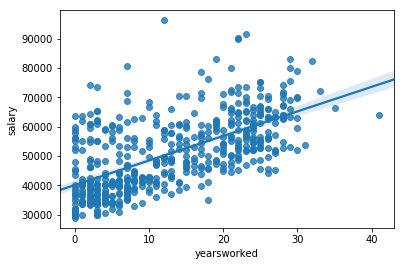

In [25]:
sns.regplot(x='yearsworked',y='salary',data=df)
plt.show()

###### There is a positive correlation between the number of years worked and salary. In most cases, the longer someone has worked, the more money they earn.

###### However there are some points where individuals earn a lot of money with less than 10 years worth of experience. From studying the data I noticed that individuals who earn a salary of more than R70 000 with less than 10 years of experience are executives.

###### The field in which the individual works in is not a major influence because those special individuals are found across all fields. However, I noticed that engineers earn a higher salary than their counterparts.

###### I also observed that high earning individuals with less experience in that field have more experience prior to working in that field compared to their counterparts. Individuals who have little to no experience prior to working in that field usually take more time to earn the same salary as their counterparts.

In [26]:
r = scipy.stats.pearsonr(df['yearsworked'],df['salary'])
r

(0.6230314515861767, 1.3460675831180352e-56)

###### The Pearson correlation coefficient is 0.62 . This indicates a moderate positive correlation which means that as the number of years worked increases, so does the salary. However, there are other factors that affect increased earnings including the individual's experience in other fields, position and field. The p-value is 1.34e56 so this correlation is not statistically significant. This causes us to reject the null hypothesis which states that salary increases as the number of years worked increases.

Text(0.5,1,'Graph showing earning potential for each field')

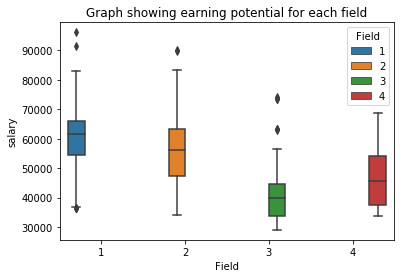

In [27]:
sns.boxplot(x='Field',y='salary',data=df,hue='Field')
plt.title('Graph showing earning potential for each field')

###### In the above graph, 1= Engineering, 2=Finance, 3=Human Resources, 4=Marketing. From the graph we can see that engineering professionals have a higher earning potential which is concentrated between R40 000 and >= R80 000. Finance professionals come in second with earnings concentrated between R50 000 and R70 000. Human Resources professionals earn the least amount of money with earnings concentrated between R30 000 and R50 000.  Marketing professionals have earnings concentrated between R40 000 and R60 000.

Text(0.5,1,'Graph showing the earning potential with/without a degree')

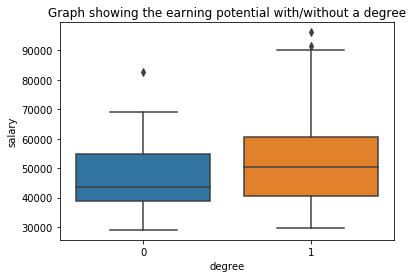

In [28]:
sns.boxplot(x='degree',y='salary',data=df)
plt.title('Graph showing the earning potential with/without a degree')

###### From the above graph we can observe that people who have at least one degree earn significantly more money than people without degrees.

## Conclusion
### Field
###### We can conclude that the type of field an individual works in has an effect on the amount of money they make. Individuals in the engineering and finance fields earn more money than individuals in the marketing and human resources fields.

### Years Worked
###### More experience leads to a higher salary. However as seen, some individuals earn a high salary in less than 10 years. This is due to having a lot of experience prior to working in that field. We can therefore conclude that the number of years worked does not directly influence how much one earns.

### Education
###### People with degrees earn significantly more money than people without degrees. This could be due to learning highly specialised skills.

### Gender
###### Men have a higher average salary than women. This could be due to the fact that more men hold executive positions while more women hold junior or managerial positions. The reasoning behind this could be that women spend more years absent from work than men do.